In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
stats.chisqprob = lambda chisq,df:stats.chi2.sf(chisq,df)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
path = "/home/iamchiranjeeb/Desktop/amita/train.csv"
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df.shape

(2000, 21)

In [5]:
X = df.drop(['price_range'],axis=1)
y = df['price_range']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [9]:
model1 = LogisticRegression(solver='lbfgs')
model1.fit(X_train,y_train)

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:94

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
predict1 = model1.predict(X_test)
predict1

array([3, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1, 3, 1, 2, 3, 0, 3, 2, 2, 2, 0, 0,
       3, 2, 1, 3, 3, 2, 3, 1, 3, 0, 2, 1, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       2, 3, 0, 2, 3, 2, 1, 2, 0, 3, 0, 3, 3, 2, 0, 3, 3, 2, 3, 2, 0, 3,
       3, 3, 2, 2, 3, 3, 1, 0, 1, 3, 3, 2, 2, 1, 3, 1, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 1, 0, 0, 3, 3, 3, 0, 3, 1, 2, 2, 0, 3, 3, 3, 2, 2, 3,
       2, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 3, 2, 2, 0, 2, 1, 0, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 2, 1, 3, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 2, 0, 3, 1, 3, 2, 2, 2, 0, 3, 3, 3, 3, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 1, 3, 2, 0, 1, 2, 1, 3, 0, 3, 3, 1, 2, 0, 2, 2, 2, 1, 3,
       2, 0])

In [12]:
accuracy_score(y_test,predict1)

0.685

In [13]:
cm1 = confusion_matrix(y_test,predict1)

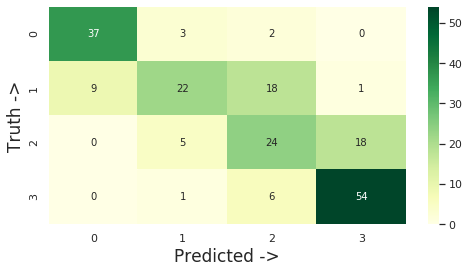

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(cm1,annot=True,cmap='YlGn')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [16]:
print('Misclassification Rate : ',(3+2+9+18+1+5+18+1+6)/200)

Misclassification Rate :  0.315


# Feature Selection

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
bestFeatures = SelectKBest(score_func=chi2,k=10)

In [20]:
fit = bestFeatures.fit(X,y)

In [21]:
dfScores = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(X.columns)

In [22]:
features = pd.concat([dfColumns,dfScores],axis=1)
features.columns = ['Specs','Score']

In [23]:
features #More The Score More Important

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [24]:
print(features.nlargest(10,'Score')) #Prints top two Important Features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


# Model2 With Top 10 Features

In [28]:
df2 = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h','price_range']]

In [29]:
df2.head(3)

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h,price_range
0,2549,20,842,756,188,7,7,19,1,9,1
1,2631,905,1021,1988,136,53,3,7,0,17,2
2,2603,1263,563,1716,145,41,2,9,2,11,2


In [30]:
X = df2.drop(['price_range'],axis=1)
y = df2['price_range']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [33]:
model2 = LogisticRegression(solver='lbfgs')
model2.fit(X_train,y_train)

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:94

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
predict2 = model2.predict(X_test)
predict2

array([3, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 2, 0, 0,
       3, 1, 1, 3, 3, 1, 3, 1, 3, 0, 2, 1, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       3, 3, 0, 2, 3, 2, 1, 2, 0, 3, 0, 3, 3, 2, 0, 3, 3, 1, 2, 2, 2, 3,
       3, 3, 3, 2, 3, 3, 1, 0, 1, 3, 3, 2, 2, 1, 3, 1, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 1, 0, 0, 3, 3, 3, 0, 2, 1, 2, 2, 1, 3, 3, 3, 2, 2, 3,
       2, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 3, 2, 2, 0, 2, 1, 0, 0, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 0, 2, 1, 3, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 2, 0, 3, 3, 3, 3, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 3, 2, 0, 2, 2, 1, 1, 0, 3, 3, 1, 2, 0, 2, 2, 2, 1, 2,
       2, 0])

In [37]:
accuracy_score(y_test,predict2)

0.71

In [42]:
cm2 = confusion_matrix(y_test,predict2)

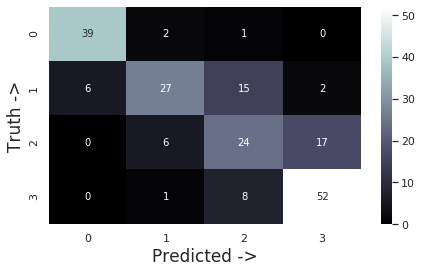

In [46]:
plt.figure(figsize=(7,4))
sns.heatmap(cm2,annot=True,cmap='bone')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [47]:
print('Misclassification Rate : ', (2+1+6+15+2+6+17+1+8)/200)

Misclassification Rate :  0.29


# Model3 With Top 8 Features

### Top 8 Features

In [38]:
print(features.nlargest(8,'Score')) #Prints top two Important Features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400


In [39]:
df3 = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','price_range']]

In [40]:
df3.shape

(2000, 9)

In [41]:
X = df3.drop(['price_range'],axis=1)
y = df3['price_range']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [49]:
model3 = LogisticRegression(solver='lbfgs')
model3.fit(X_train,y_train)

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predict3 = model3.predict(X_test)
predict3

array([3, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1, 3, 1, 2, 2, 0, 3, 2, 2, 2, 0, 0,
       3, 2, 1, 2, 3, 2, 3, 0, 1, 0, 2, 1, 2, 3, 0, 0, 3, 2, 3, 3, 3, 3,
       3, 3, 0, 1, 3, 2, 0, 2, 0, 3, 0, 3, 3, 2, 0, 3, 3, 1, 2, 2, 2, 3,
       3, 3, 2, 2, 3, 3, 1, 0, 1, 3, 3, 1, 2, 1, 3, 1, 3, 0, 0, 0, 2, 0,
       1, 3, 1, 2, 1, 0, 0, 3, 2, 3, 0, 3, 1, 2, 2, 0, 3, 3, 3, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 2, 1, 0, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 2, 1, 3, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 2, 0, 3, 3, 3, 3, 0, 1, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 3, 2, 0, 2, 2, 1, 3, 0, 3, 3, 1, 3, 0, 2, 2, 2, 1, 3,
       2, 0])

In [51]:
accuracy_score(y_test,predict3)

0.64

In [52]:
cm3 = confusion_matrix(y_test,predict3)

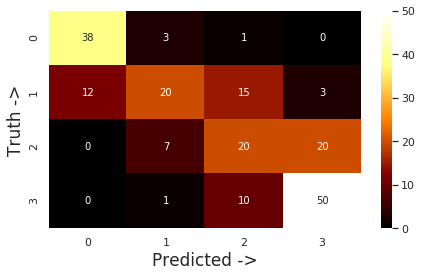

In [53]:
plt.figure(figsize=(7,4))
sns.heatmap(cm3,annot=True,cmap='afmhot')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [54]:
print('Misclassification Rate : ',(3+1+12+15+3+7+20+1+10)/200)

Misclassification Rate :  0.36


# Model4 With Top 12 Features

### Top 12 Features

In [56]:
print(features.nlargest(12,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


In [57]:
df4 = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h','pc','n_cores','price_range']]

In [58]:
X = df4.drop(['price_range'],axis=1)
y = df4['price_range']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [60]:
model4 = LogisticRegression(solver='lbfgs')
model4.fit(X_train,y_train)

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:94

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
predict4 = model4.predict(X_test)
predict4

array([3, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1, 3, 1, 2, 3, 0, 3, 2, 2, 2, 0, 0,
       3, 2, 1, 3, 3, 2, 3, 1, 3, 0, 2, 1, 2, 3, 0, 0, 3, 3, 3, 2, 3, 3,
       2, 3, 0, 2, 3, 2, 1, 2, 0, 3, 0, 3, 3, 2, 0, 3, 3, 1, 3, 2, 0, 3,
       3, 3, 2, 2, 3, 3, 1, 0, 1, 3, 3, 2, 2, 1, 3, 1, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 1, 0, 0, 3, 3, 3, 0, 3, 1, 2, 2, 0, 3, 3, 3, 2, 2, 3,
       2, 0, 0, 2, 3, 3, 0, 1, 0, 0, 0, 3, 2, 2, 0, 2, 1, 0, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 2, 1, 3, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 2, 1,
       3, 2, 0, 3, 1, 3, 2, 2, 2, 0, 3, 3, 3, 3, 0, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 1, 3, 2, 0, 1, 2, 1, 1, 0, 3, 3, 1, 2, 0, 2, 2, 1, 1, 3,
       2, 0])

In [62]:
accuracy_score(y_test,predict4)

0.67

In [63]:
cm4 = confusion_matrix(y_test,predict4)

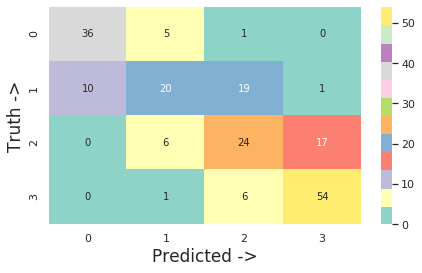

In [75]:
plt.figure(figsize=(7,4))
sns.heatmap(cm4,annot=True,cmap='Set3')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [76]:
print('Misclassification Rate : ',(5+1+10+19+1+6+17+1+6)/200)

Misclassification Rate :  0.33


# Model5 With Top 4 Features

### Top 4 Features

In [119]:
print(features.nlargest(4,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750


In [108]:
df5 = df[['ram','px_height','battery_power','px_width','price_range']]

In [109]:
X = df5.drop(['price_range'],axis=1)
y = df5['price_range']

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [111]:
model5 = LogisticRegression(solver='lbfgs')
model5.fit(X_train,y_train)

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
predict5 = model5.predict(X_test)

In [113]:
predict5

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 2, 3, 2, 1, 3, 0, 3, 0, 3, 2, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 1, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 3, 0, 0, 1, 0, 0, 3, 1, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 2, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 2, 3, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0])

In [114]:
accuracy_score(y_test,predict5)

0.86

In [115]:
cm5 = confusion_matrix(y_test,predict5)

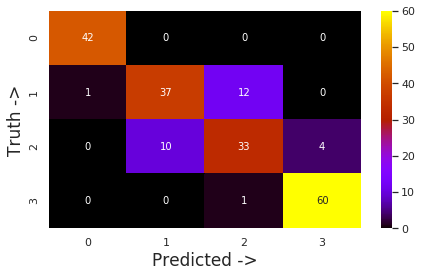

In [116]:
plt.figure(figsize=(7,4))
sns.heatmap(cm5,annot=True,cmap='gnuplot')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [118]:
print('Misclassification Rate : ',(1+12+10+4+1)/200)

Misclassification Rate :  0.14


# Model6 With Top 6 Features

### Top 6 Features

In [131]:
print(features.nlargest(6,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124


In [132]:
df6 = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','price_range']]

In [133]:
X = df6.drop(['price_range'],axis=1)
y = df6['price_range']

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [135]:
model6 = LogisticRegression(solver='lbfgs')
model6.fit(X_train,y_train)

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
predict6 = model6.predict(X_test)
predict6

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 2, 0, 0,
       3, 2, 1, 2, 3, 2, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 2, 2, 3, 3,
       2, 3, 0, 2, 3, 2, 1, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 1,
       1, 3, 1, 2, 1, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 3, 0, 0, 1, 0, 0, 3, 1, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 2, 1, 2, 2, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 2, 0, 2, 2, 1, 2, 0, 3, 3, 1, 2, 0, 2, 3, 0, 1, 2,
       2, 0])

In [137]:
accuracy_score(y_test,predict6)

0.835

In [138]:
cm6 = confusion_matrix(y_test,predict6)

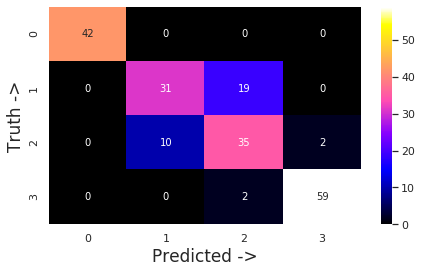

In [139]:
plt.figure(figsize=(7,4))
sns.heatmap(cm6,annot=True,cmap='gnuplot2')
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [140]:
print('Misclassification Rate : ',(10+19+2+2)/200)

Misclassification Rate :  0.165


# We Can See Model 5 is The Best Model as it has higher Accuracy Score